# 7. Wyniki końcowe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 2)

## 1) Dane wejściowe z notatek

In [2]:
summary_rows = [
    {
        "Model": "LSTM (trained on silesia)",
        "Dataset": "all_canterbury",
        "Compression_Bps": 25121.45,
        "Decompression_Bps": 25530.53,
        "Ratio_x": 1.58,
        "BPC": 5.07,
    },
        {
        "Model": "LSTM (trained on silesia)",
        "Dataset": "canterbury_small",
        "Compression_Bps": 24500.38,
        "Decompression_Bps": 24030.46,
        "Ratio_x": 1.77,
        "BPC": 4.51,
    },
    {
        "Model": "GRU (trained on silesia)",
        "Dataset": "all_canterbury",
        "Compression_Bps": 5931.78,
        "Decompression_Bps": 5840.65,
        "Ratio_x": 1.84,
        "BPC": 4.35,
    },
    {
        "Model": "GRU (trained on silesia)",
        "Dataset": "canterbury_small",
        "Compression_Bps": 5794.42,
        "Decompression_Bps": 5836.60,
        "Ratio_x": 2.89,
        "BPC": 2.77,
    },
    {
        "Model": "GPT-2",
        "Dataset": "canterbury_small",
        "Compression_Bps": 432.59,
        "Decompression_Bps": 423.16,
        "Ratio_x": 4.75,
        "BPC": 1.68,
    },
    {
        "Model": "DistilGPT-2",
        "Dataset": "canterbury_small",
        "Compression_Bps": 746.24,
        "Decompression_Bps": 803.80,
        "Ratio_x": 4.20,
        "BPC": 1.90,
    },
    {
        "Model": "ZIP (9lvl)",
        "Dataset": "canterbury_small",
        "Compression_Bps": 1.445e+07,                
        "Decompression_Bps": 7.182e+06,
        "Ratio_x": 2.090,
        "BPC": 3.827,
    },
        {
        "Model": "ZIP (9lvl)",
        "Dataset": "all_canterbury",
        "Compression_Bps": 6.416e+06,     
        "Decompression_Bps": 9.346e+08,  
        "Ratio_x": 3.346,
        "BPC": 2.391,
    },
]

df_summary = pd.DataFrame(summary_rows)
df_summary

,Model,Dataset,Compression_Bps,Decompression_Bps,Ratio_x,BPC
0,LSTM (trained on silesia),all_canterbury,2.51e+04,2.55e+04,1.58,5.07
1,LSTM (trained on silesia),canterbury_small,2.45e+04,2.40e+04,1.77,4.51
2,GRU (trained on silesia),all_canterbury,5.93e+03,5.84e+03,1.84,4.35
3,GRU (trained on silesia),canterbury_small,5.79e+03,5.84e+03,2.89,2.77
4,GPT-2,canterbury_small,4.33e+02,4.23e+02,4.75,1.68
5,DistilGPT-2,canterbury_small,7.46e+02,8.04e+02,4.20,1.90
6,ZIP (9lvl),canterbury_small,1.44e+07,7.18e+06,2.09,3.83
7,ZIP (9lvl),all_canterbury,6.42e+06,9.35e+08,3.35,2.39


## 2) all_canterbury: LSTM vs GRU vs ZIP

,Model,Compression_Bps,Decompression_Bps,Ratio_x,BPC
7,ZIP (9lvl),6.42e+06,9.35e+08,3.35,2.39
0,LSTM (trained on silesia),2.51e+04,2.55e+04,1.58,5.07
2,GRU (trained on silesia),5.93e+03,5.84e+03,1.84,4.35


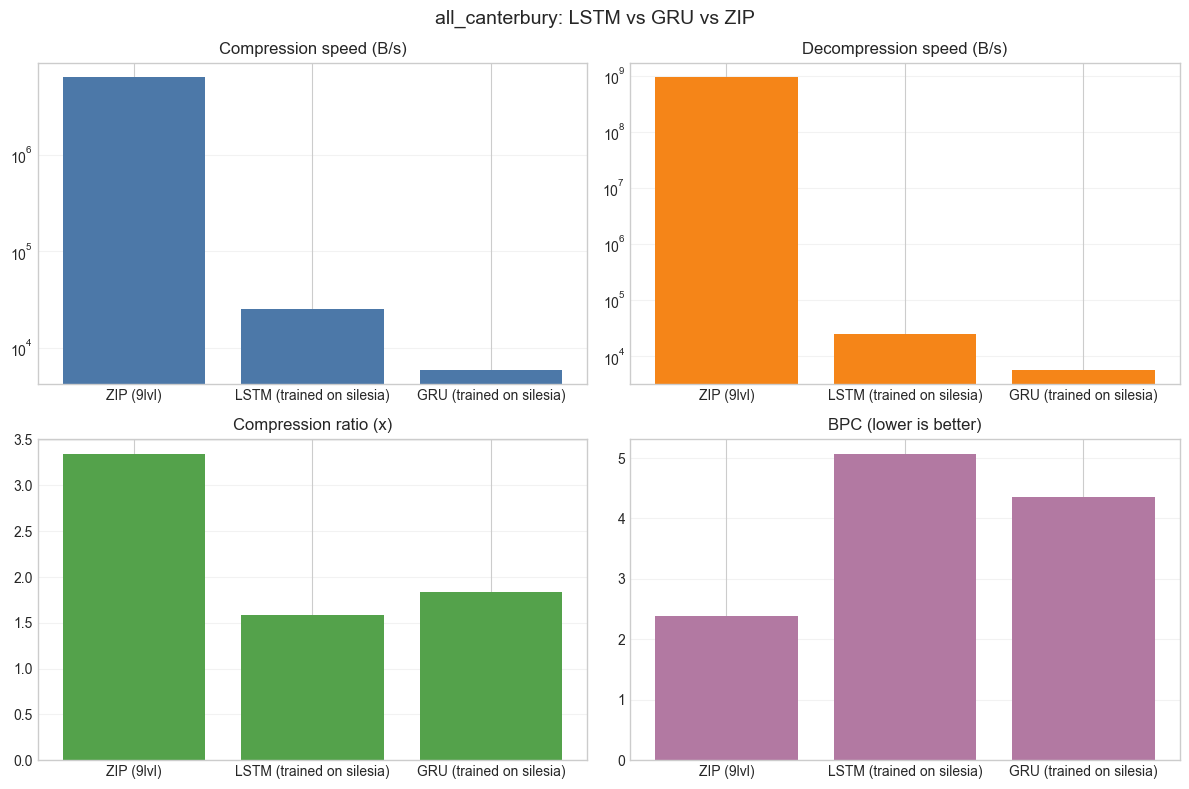

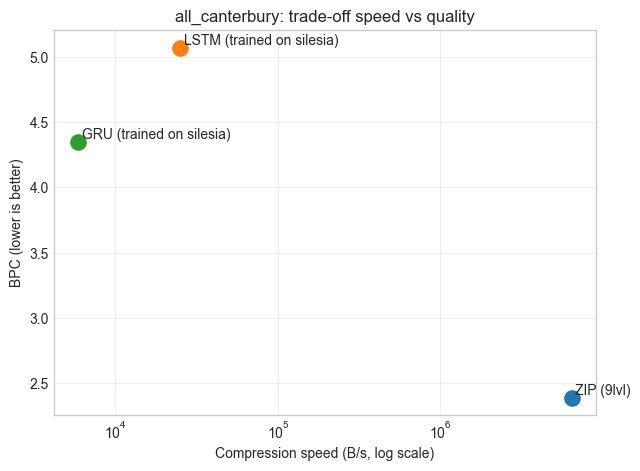

In [3]:
df_all = df_summary[df_summary["Dataset"] == "all_canterbury"].copy()
df_all = df_all.sort_values("Compression_Bps", ascending=False)

display(df_all[["Model", "Compression_Bps", "Decompression_Bps", "Ratio_x", "BPC"]])

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
models = df_all["Model"].to_list()
x = np.arange(len(models))

axes[0, 0].bar(x, df_all["Compression_Bps"], color="#4C78A8")
axes[0, 0].set_title("Compression speed (B/s)")
axes[0, 0].set_xticks(x, models)
axes[0, 0].set_yscale("log")

axes[0, 1].bar(x, df_all["Decompression_Bps"], color="#F58518")
axes[0, 1].set_title("Decompression speed (B/s)")
axes[0, 1].set_xticks(x, models)
axes[0, 1].set_yscale("log")

axes[1, 0].bar(x, df_all["Ratio_x"], color="#54A24B")
axes[1, 0].set_title("Compression ratio (x)")
axes[1, 0].set_xticks(x, models)

axes[1, 1].bar(x, df_all["BPC"], color="#B279A2")
axes[1, 1].set_title("BPC (lower is better)")
axes[1, 1].set_xticks(x, models)

for ax in axes.flat:
    ax.grid(axis="y", alpha=0.25)

fig.suptitle("all_canterbury: LSTM vs GRU vs ZIP", fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
for _, row in df_all.iterrows():
    plt.scatter(row["Compression_Bps"], row["BPC"], s=120)
    plt.text(row["Compression_Bps"] * 1.05, row["BPC"] + 0.02, row["Model"], fontsize=10)

plt.xscale("log")
plt.xlabel("Compression speed (B/s, log scale)")
plt.ylabel("BPC (lower is better)")
plt.title("all_canterbury: trade-off speed vs quality")
plt.grid(alpha=0.3)
plt.show()

## 3) canterbury_small: GRU vs GPT-2 vs DistilGPT-2 vs ZIP

,Model,Compression_Bps,Decompression_Bps,Ratio_x,BPC
6,ZIP (9lvl),1.44e+07,7.18e+06,2.09,3.83
1,LSTM (trained on silesia),2.45e+04,2.40e+04,1.77,4.51
3,GRU (trained on silesia),5.79e+03,5.84e+03,2.89,2.77
5,DistilGPT-2,7.46e+02,8.04e+02,4.20,1.90
4,GPT-2,4.33e+02,4.23e+02,4.75,1.68


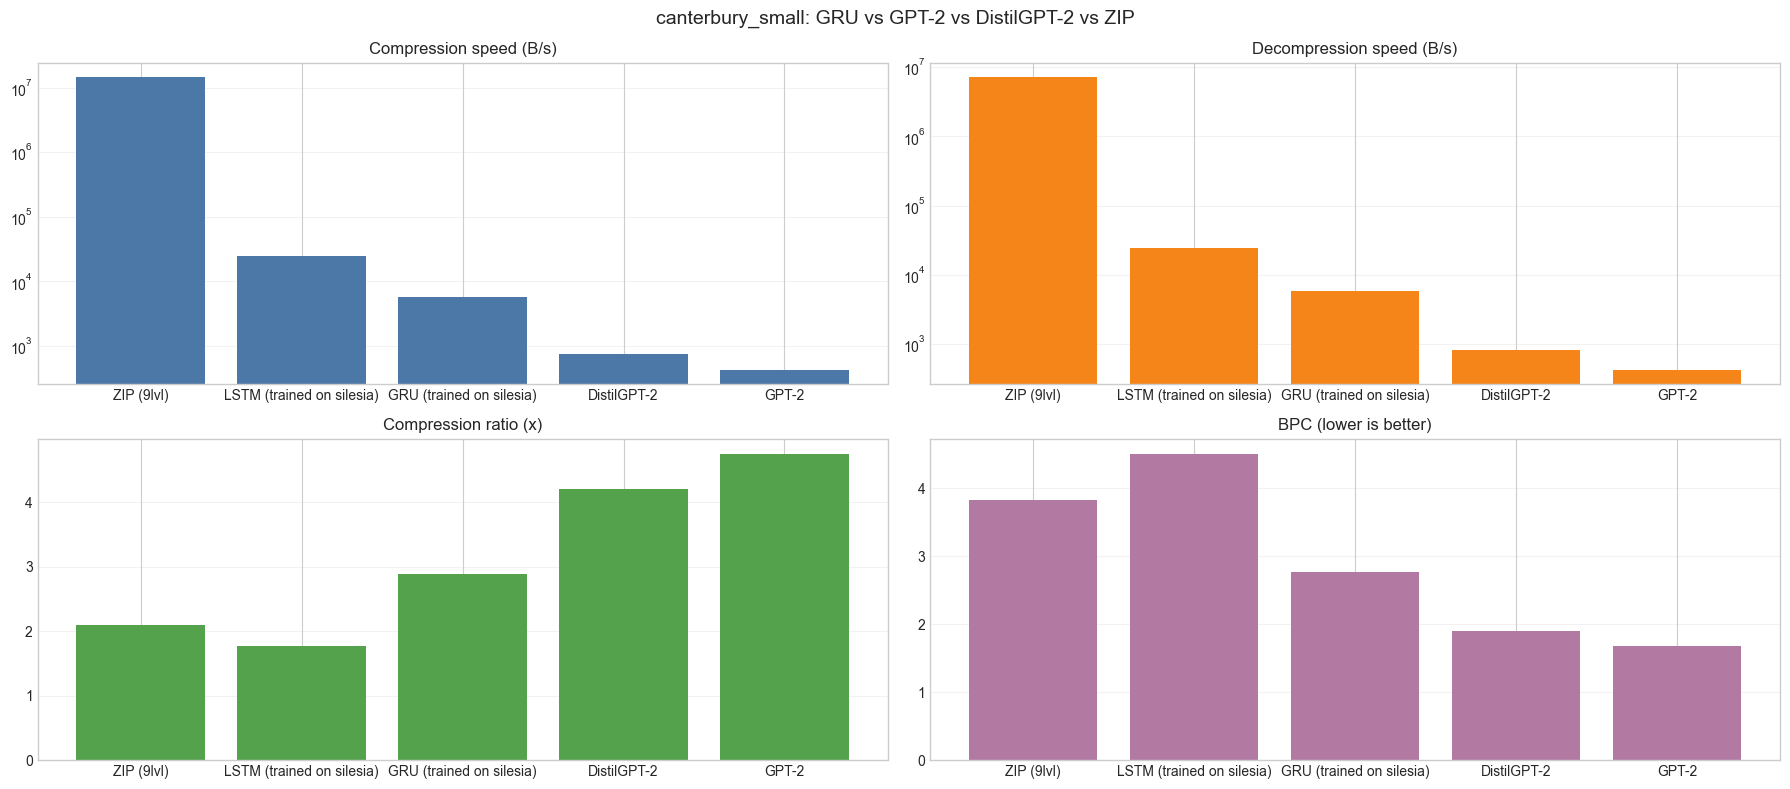

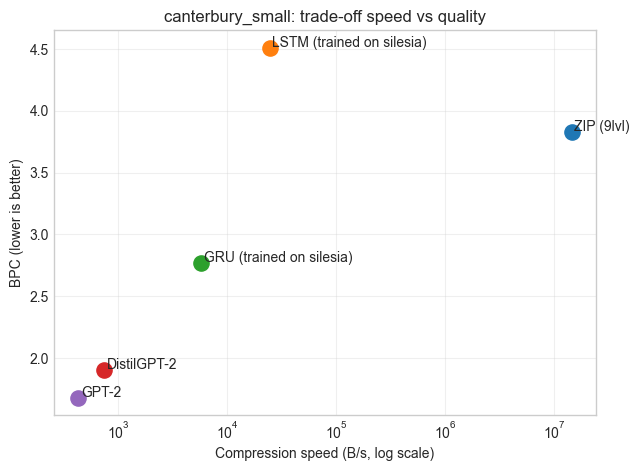

In [11]:
df_small = df_summary[df_summary["Dataset"] == "canterbury_small"].copy()
df_small = df_small.sort_values("Compression_Bps", ascending=False)

display(df_small[["Model", "Compression_Bps", "Decompression_Bps", "Ratio_x", "BPC"]])

fig, axes = plt.subplots(2, 2, figsize=(18, 8))
models = df_small["Model"].to_list()
x = np.arange(len(models))

axes[0, 0].bar(x, df_small["Compression_Bps"], color="#4C78A8")
axes[0, 0].set_title("Compression speed (B/s)")
axes[0, 0].set_xticks(x, models)
axes[0, 0].set_yscale("log")

axes[0, 1].bar(x, df_small["Decompression_Bps"], color="#F58518")
axes[0, 1].set_title("Decompression speed (B/s)")
axes[0, 1].set_xticks(x, models)
axes[0, 1].set_yscale("log")

axes[1, 0].bar(x, df_small["Ratio_x"], color="#54A24B")
axes[1, 0].set_title("Compression ratio (x)")
axes[1, 0].set_xticks(x, models)

axes[1, 1].bar(x, df_small["BPC"], color="#B279A2")
axes[1, 1].set_title("BPC (lower is better)")
axes[1, 1].set_xticks(x, models)

for ax in axes.flat:
    ax.grid(axis="y", alpha=0.25)

fig.suptitle("canterbury_small: GRU vs GPT-2 vs DistilGPT-2 vs ZIP", fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
for _, row in df_small.iterrows():
    plt.scatter(row["Compression_Bps"], row["BPC"], s=120)
    plt.text(row["Compression_Bps"] * 1.05, row["BPC"] + 0.01, row["Model"], fontsize=10)

plt.xscale("log")
plt.xlabel("Compression speed (B/s, log scale)")
plt.ylabel("BPC (lower is better)")
plt.title("canterbury_small: trade-off speed vs quality")
plt.grid(alpha=0.3)
plt.show()

## 4) Ile danych w 1h? (compress/decompress throughput)

Wykres pokazuje, ile danych każdy model jest w stanie skompresować i zdekompresować w ciągu 1 godziny.

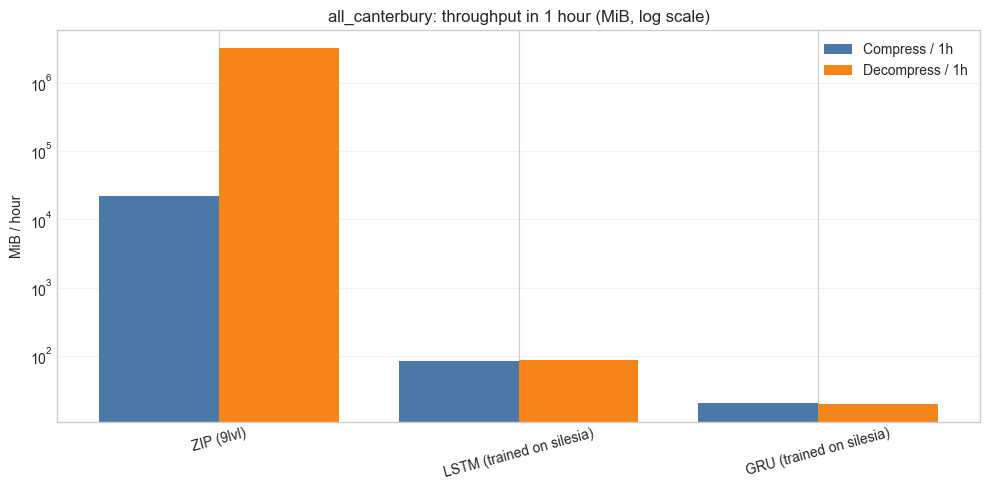

,Model,Comp_MiB_per_hour,Decomp_MiB_per_hour
0,ZIP (9lvl),22027.59,3.21e+06
1,LSTM (trained on silesia),86.25,8.77e+01
2,GRU (trained on silesia),20.37,2.01e+01


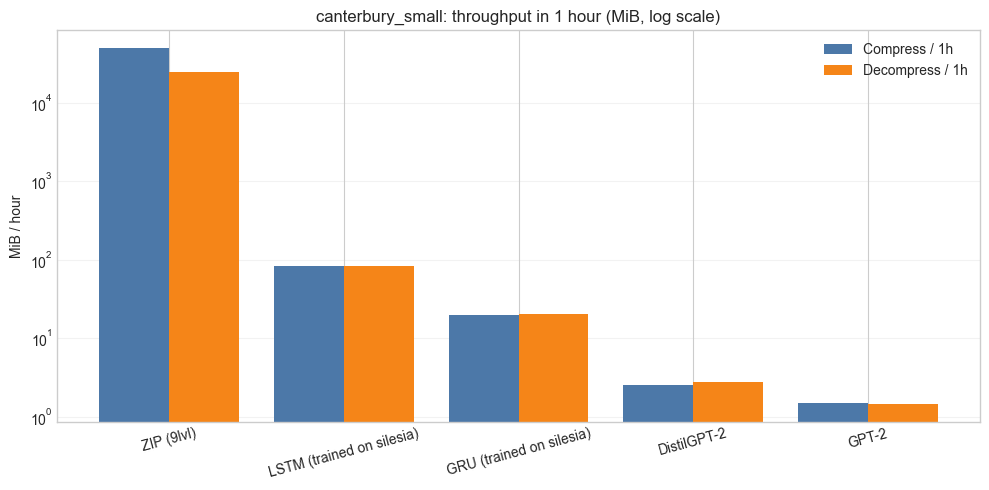

,Model,Comp_MiB_per_hour,Decomp_MiB_per_hour
0,ZIP (9lvl),49610.14,24657.44
1,LSTM (trained on silesia),84.12,82.50
2,GRU (trained on silesia),19.89,20.04
3,DistilGPT-2,2.56,2.76
4,GPT-2,1.49,1.45


In [5]:
MIB = 1024**2


def plot_per_hour_mib(df_dataset, title):
    df_plot = df_dataset[["Model", "Compression_Bps", "Decompression_Bps"]].copy()

    df_plot["Comp_MiB_per_hour"] = (df_plot["Compression_Bps"] * 3600) / MIB
    df_plot["Decomp_MiB_per_hour"] = (df_plot["Decompression_Bps"] * 3600) / MIB

    x = np.arange(len(df_plot))
    width = 0.4

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(x - width / 2, df_plot["Comp_MiB_per_hour"], width, label="Compress / 1h", color="#4C78A8")
    ax.bar(x + width / 2, df_plot["Decomp_MiB_per_hour"], width, label="Decompress / 1h", color="#F58518")

    ax.set_xticks(x, df_plot["Model"], rotation=15)
    ax.set_ylabel("MiB / hour")
    ax.set_title(title)
    ax.set_yscale("log")
    ax.grid(axis="y", alpha=0.25)
    ax.legend()

    plt.tight_layout()
    plt.show()

    display(
        df_plot[["Model", "Comp_MiB_per_hour", "Decomp_MiB_per_hour"]]
        .sort_values("Comp_MiB_per_hour", ascending=False)
        .reset_index(drop=True)
    )


plot_per_hour_mib(df_all, "all_canterbury: throughput in 1 hour (MiB, log scale)")
plot_per_hour_mib(df_small, "canterbury_small: throughput in 1 hour (MiB, log scale)")